In [2]:
import json
from typing import List, Tuple

import torch
import torch.optim as optim
from IPython.display import display
from PIL import Image
from torch import Tensor
from torchvision import models, transforms
from torchvision.models.resnet import ResNet

In [6]:
def load_model_and_labels() -> Tuple[ResNet, List[str]]:
    model = models.resnet18(pretrained=True)
    with open("imagenet-labels.json") as f:
        labels = json.load(f)
    model.eval()
    return model, labels


def load_image(image_path: str) -> Image.Image:
    return Image.open(image_path)


def preprocess_image(
    image: Image.Image, resize_size: int = 256, crop_size: int = 224
) -> Tensor:
    imagenet_mean = [0.485, 0.456, 0.406]
    imagenet_std = [0.229, 0.224, 0.225]
    preprocess = transforms.Compose(
        [
            transforms.Resize(resize_size),
            transforms.CenterCrop(crop_size),
            transforms.ToTensor(),
            transforms.Normalize(mean=imagenet_mean, std=imagenet_std),
        ]
    )
    return preprocess(image)


def predict(model: ResNet, image: torch.Tensor) -> Tensor:
    input_image = image.unsqueeze(0)
    with torch.no_grad():
        output = model(input_image)
    probabilities = torch.nn.functional.softmax(output[0], dim=0)
    _, indices = torch.topk(probabilities, 1)
    return indices

In [7]:
model, labels = load_model_and_labels()
image = load_image("imgs/ostrich.jpeg")
input_batch = preprocess_image(image)
indices = predict(model, input_batch)

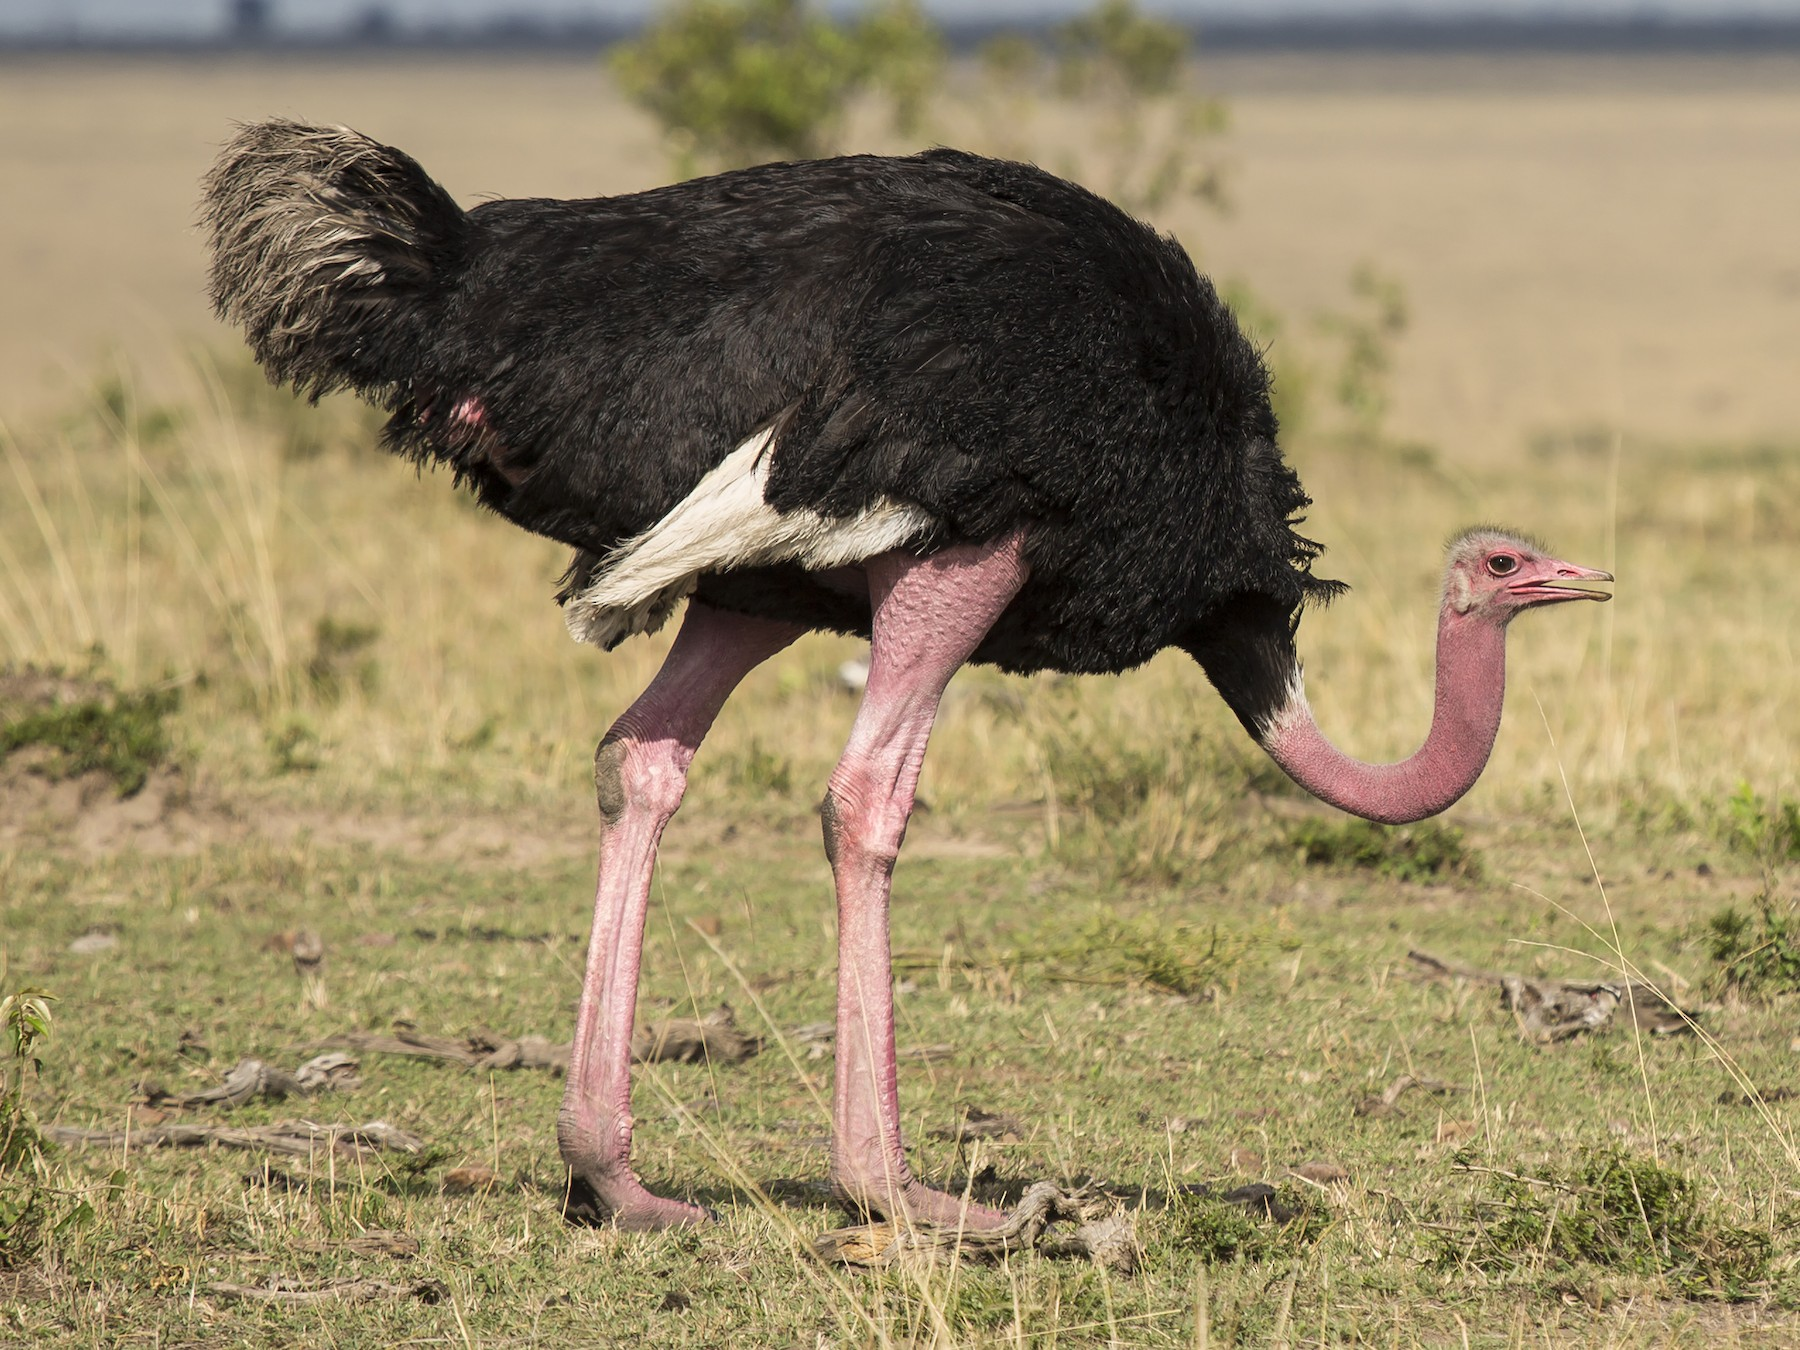

ostrich


In [8]:
display(image)
print(labels[indices.item()])